In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Set the paths to your male and female image folders
male_data_dir = "E:\Thesis\dataset\Final Dataset\Testing\male"
female_data_dir = "E:\Thesis\dataset\Final Dataset\Testing\Female"

In [3]:
# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

# Create a feature extractor from the base model
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Set batch size and initialize empty lists for predicted labels and true labels
batch_size = 16
predicted_labels = []
true_labels = []



In [12]:
# Predict labels for male images
male_image_paths = [os.path.join(male_data_dir, f) for f in os.listdir(male_data_dir) if f.endswith('.png') or f.endswith('.jpg')]
num_male_images = len(male_image_paths)
for i in range(0, num_male_images, batch_size):
    batch_paths = male_image_paths[i : i + batch_size]
    batch_images = [img_to_array(load_img(path, target_size=(512, 512))) for path in batch_paths]
    batch_images = np.array(batch_images)
    batch_images = preprocess_input(batch_images)
    batch_predicted_probs = model.predict(batch_images)
    batch_predicted_labels = np.argmax(batch_predicted_probs, axis=1)
    predicted_labels.extend(batch_predicted_labels)
    true_labels.extend([1 if 'female' in os.path.basename(path) else 0 for path in batch_paths])

1/1 [==============================] - 0s 35ms/step


In [6]:
# Predict labels for female images
female_image_paths = [os.path.join(female_data_dir, f) for f in os.listdir(female_data_dir) if f.endswith('.png') or f.endswith('.jpg')]
num_female_images = len(female_image_paths)
for i in range(0, num_female_images, batch_size):
    batch_paths = female_image_paths[i : i + batch_size]
    batch_images = [img_to_array(load_img(path, target_size=(512, 512))) for path in batch_paths]
    batch_images = np.array(batch_images)
    batch_images = preprocess_input(batch_images)
    batch_predicted_probs = model.predict(batch_images)
    batch_predicted_labels = np.argmax(batch_predicted_probs, axis=1)
    female_predicted_labels.extend(batch_predicted_labels)

1/1 [==============================] - 0s 34ms/step


In [13]:
# Predict labels for female images
female_image_paths = [os.path.join(female_data_dir, f) for f in os.listdir(female_data_dir) if f.endswith('.png') or f.endswith('.jpg')]
num_female_images = len(female_image_paths)
for i in range(0, num_female_images, batch_size):
    batch_paths = female_image_paths[i : i + batch_size]
    batch_images = [img_to_array(load_img(path, target_size=(512, 512))) for path in batch_paths]
    batch_images = np.array(batch_images)
    batch_images = preprocess_input(batch_images)
    batch_predicted_probs = model.predict(batch_images)
    batch_predicted_labels = np.argmax(batch_predicted_probs, axis=1)
    predicted_labels.extend(batch_predicted_labels)
    true_labels.extend([1 if 'female' in os.path.basename(path) else 0 for path in batch_paths])

1/1 [==============================] - 0s 33ms/step


In [14]:
# Create a dictionary to map label indices to label names
label_map = {0: 'male', 1: 'female'}

In [15]:
# Print the predicted labels for the male images
print("Predicted labels for male images:")
for i, path in enumerate(male_image_paths):
    label = label_map[predicted_labels[i]]
    print('Image:', path, 'Predicted label:', label)

# Print the predicted labels for the female images
print("Predicted labels for female images:")
for i, path in enumerate(female_image_paths):
    label = label_map[predicted_labels[i]]
    print('Image:', path, 'Predicted label:', label)

Predicted labels for male images:
Image: E:\Thesis\dataset\Final Dataset\Testing\male\male (3001).png Predicted label: female
Image: E:\Thesis\dataset\Final Dataset\Testing\male\male (3002).png Predicted label: female
Image: E:\Thesis\dataset\Final Dataset\Testing\male\male (3003).png Predicted label: female
Image: E:\Thesis\dataset\Final Dataset\Testing\male\male (3004).png Predicted label: female
Image: E:\Thesis\dataset\Final Dataset\Testing\male\male (3005).png Predicted label: female
Image: E:\Thesis\dataset\Final Dataset\Testing\male\male (3006).png Predicted label: female
Image: E:\Thesis\dataset\Final Dataset\Testing\male\male (3007).png Predicted label: male
Image: E:\Thesis\dataset\Final Dataset\Testing\male\male (3008).png Predicted label: female
Image: E:\Thesis\dataset\Final Dataset\Testing\male\male (3009).png Predicted label: female
Image: E:\Thesis\dataset\Final Dataset\Testing\male\male (3010).png Predicted label: male
Image: E:\Thesis\dataset\Final Dataset\Testing\mal

In [16]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print('Accuracy:', accuracy)

Accuracy: 0.535


In [17]:
# Generate classification report
class_names = [label_map[i] for i in range(len(label_map))]
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

        male       0.81      0.09      0.16       600
      female       0.52      0.98      0.68       600

    accuracy                           0.54      1200
   macro avg       0.66      0.54      0.42      1200
weighted avg       0.66      0.54      0.42      1200



In [18]:
# Create confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(confusion_mat)

Confusion Matrix:
[[ 55 545]
 [ 13 587]]


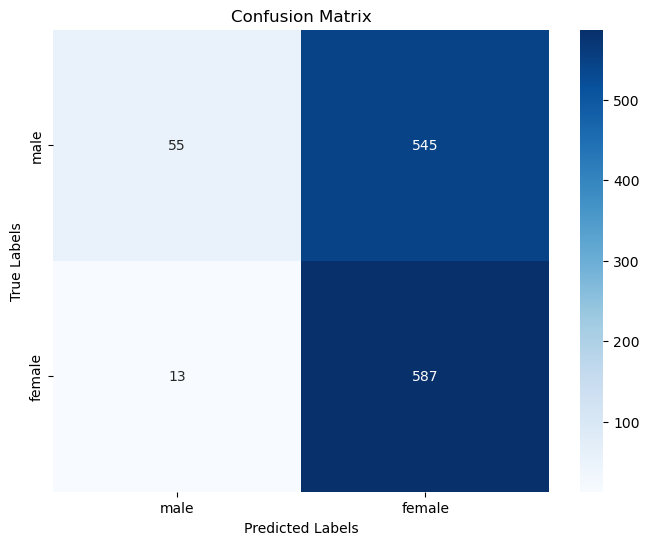

In [20]:
# Plot confusion matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
labels = ["male", "female"]
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
